In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import networkit as nk
from tqdm import tqdm
import networkx as nx

from benji_girgs import generation, utils, plotting
import geopandas as gpd


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
n=1000
d=2
tau=2.5
alpha=6.0
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha)

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:114: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


In [80]:
n = 40

edges = set()
nodes = {}
for i in range(n):
    for j in range(n):
        node = i*n + j
        nodes[(i, j)] = node

for i in range(n):
    for j in range(n):
        for delta in [+1, -1]:
            for which in [0, 1]:
                node1 = nodes[(i, j)]
                i1 = delta if which == 0 else 0
                j1 = delta if which == 1 else 0
                node2 = nodes[((i + i1) % n, (j+j1) %n)]
                _ = edges.add((min(node1, node2), max(node1, node2)))

g = nk.Graph(len(nodes))
for edge in edges:
    _ = g.addEdge(*edge)

In [81]:
gnx = nk.nxadapter.nk2nx(g)

A = nx.linalg.adjacency_matrix(gnx).todense()

D = np.array([x[1] for x in (gnx.degree)])
D_inv = np.diag(1/D)

M = D_inv @ A

v3, Phi = np.linalg.eig(M)
v3[:6]

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_4749/1586681880.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.linalg.adjacency_matrix(gnx).todense()


array([-1.        +0.j,  1.        +0.j, -0.99384417+0.j, -0.98768834+0.j,
        0.99384417+0.j,  0.99384417+0.j])

In [82]:
gnx = nk.nxadapter.nk2nx(g)

A = nx.linalg.adjacency_matrix(gnx).todense()

D = np.array([x[1] for x in (gnx.degree)])
D_h = D**(0.5)
D_hi = D**(-0.5)

M = np.diag(1/D) @ A
S = np.diag(D_hi) @ A @ np.diag(D_hi)

w, v = np.linalg.eigh(S)
w1, v1 = np.linalg.eig(S)
w1 = w1.real
v1 = v1.real

sorted(w)

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_4749/617535330.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.linalg.adjacency_matrix(gnx).todense()


[-1.0000000000000007,
 -0.9938441702975696,
 -0.9938441702975692,
 -0.993844170297569,
 -0.9938441702975688,
 -0.9876883405951384,
 -0.9876883405951381,
 -0.9876883405951379,
 -0.9876883405951379,
 -0.9755282581475776,
 -0.9755282581475776,
 -0.9755282581475773,
 -0.9755282581475773,
 -0.9693724284451465,
 -0.9693724284451464,
 -0.9693724284451456,
 -0.9693724284451455,
 -0.9693724284451455,
 -0.9693724284451455,
 -0.969372428445145,
 -0.9693724284451444,
 -0.9510565162951543,
 -0.9510565162951541,
 -0.9510565162951541,
 -0.9510565162951533,
 -0.9455032620941844,
 -0.9455032620941842,
 -0.9455032620941841,
 -0.9455032620941836,
 -0.9393474323917539,
 -0.9393474323917539,
 -0.939347432391753,
 -0.939347432391753,
 -0.9393474323917527,
 -0.9393474323917527,
 -0.9393474323917527,
 -0.9393474323917524,
 -0.9210315202417618,
 -0.9210315202417613,
 -0.921031520241761,
 -0.921031520241761,
 -0.921031520241761,
 -0.9210315202417609,
 -0.9210315202417606,
 -0.9210315202417604,
 -0.9045084971874

In [132]:
n = 50

edges = set()
nodes = set()
for i in range(n):
    nodes.add(i)

for i in range(n):
    for delta in [+1, -1]:
        for which in [0, 1]:
            node1 = i
            node2 = (i + delta)% n
            _ = edges.add((min(node1, node2), max(node1, node2)))

g = nk.Graph(len(nodes))
for edge in edges:
    _ = g.addEdge(*edge)

In [153]:
n = 6

edges = set()
nodes = {}
for i in range(n):
    for j in range(n):
        node = i*n + j
        nodes[(i, j)] = node

for i in range(n):
    for j in range(n):
        for delta in [+1, -1]:
            for which in [0, 1]:
                node1 = nodes[(i, j)]
                i1 = delta if which == 0 else 0
                j1 = delta if which == 1 else 0
                node2 = nodes[((i + i1) % n, (j+j1) %n)]
                _ = edges.add((min(node1, node2), max(node1, node2)))

g = nk.Graph(len(nodes))
for edge in edges:
    _ = g.addEdge(*edge)

In [3]:
n=3000
d=3
tau=2.5
alpha=1.3
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.02, points_type=generation.PointsCube)

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:155: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


In [40]:
temp = np.outer(D_hi, D_hi)
temp[temp == np.inf] = 0
np.where(A[0] != 0)[1]
temp[0, 73]
temp2 = temp * A
A[0, 73]
temp2[0, 73]

array([  73,  384,  515,  759,  866,  901, 1262, 1854, 2970])

0.07856742013183861

1

2.171722173256808

In [32]:
temp = np.outer(D_hi, D_hi)
temp

array([[0.11111111, 0.19245009, 0.07856742, ..., 0.10540926, 0.0860663 ,
        0.0727393 ],
       [0.19245009, 0.33333333, 0.13608276, ..., 0.18257419, 0.1490712 ,
        0.12598816],
       [0.07856742, 0.13608276, 0.05555556, ..., 0.0745356 , 0.06085806,
        0.05143445],
       ...,
       [0.10540926, 0.18257419, 0.0745356 , ..., 0.1       , 0.08164966,
        0.06900656],
       [0.0860663 , 0.1490712 , 0.06085806, ..., 0.08164966, 0.06666667,
        0.05634362],
       [0.0727393 , 0.12598816, 0.05143445, ..., 0.06900656, 0.05634362,
        0.04761905]])

In [30]:
M = np.diag(1/D) @ A
zero_deg = np.where(D == 0)[0]
M[zero_deg, :] = 0
M[:, zero_deg] = 0
M[zero_deg, zero_deg] = 1.0

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/2101357859.py:1: RuntimeWarning: divide by zero encountered in divide
  M = np.diag(1/D) @ A
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/2101357859.py:1: RuntimeWarning: invalid value encountered in matmul
  M = np.diag(1/D) @ A


0.9999999999999999

In [31]:
np.where(D == 0)

(array([ 180,  193,  197,  238,  352,  597,  611,  732,  968, 1060, 1223,
        1350, 1415, 1428, 1595, 1733, 1765, 1942, 1969, 1974, 2078, 2190,
        2472, 2586, 2632, 2713, 2748, 2811, 2832, 2843, 2893]),)

In [4]:
gnx = nk.nxadapter.nk2nx(g)

A = nx.linalg.adjacency_matrix(gnx).todense()

D = np.array([x[1] for x in (gnx.degree)])
D_h = D**(0.5)
D_hi = D**(-0.5)

M = np.diag(1/D) @ A
M = 0.5 * M + 0.5 * np.eye(M.shape[0])
# S = np.diag(D_hi) @ A @ np.diag(D_hi)

S = np.diag(D_h) @ M @ np.diag(D_hi)
zero_deg = np.where(D == 0)[0]
S[zero_deg, :] = 0
S[:, zero_deg] = 0
S[zero_deg, zero_deg] = 1.0

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/1801264201.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.linalg.adjacency_matrix(gnx).todense()
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/1801264201.py:7: RuntimeWarning: divide by zero encountered in power
  D_hi = D**(-0.5)
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/1801264201.py:9: RuntimeWarning: divide by zero encountered in divide
  M = np.diag(1/D) @ A
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/1801264201.py:9: RuntimeWarning: invalid value encountered in matmul
  M = np.diag(1/D) @ A


In [8]:
np.where(D_hi == np.inf)

(array([ 180,  193,  197,  238,  352,  597,  611,  732,  968, 1060, 1223,
        1350, 1415, 1428, 1595, 1733, 1765, 1942, 1969, 1974, 2078, 2190,
        2472, 2586, 2632, 2713, 2748, 2811, 2832, 2843, 2893]),)

In [9]:
M @ np.diag(D_hi) 

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/474253507.py:1: RuntimeWarning: invalid value encountered in matmul
  M @ np.diag(D_hi)


matrix([[0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.28867513, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.11785113, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.15811388, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.12909944,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.10910895]])

In [16]:
S = np.diag(D_hi) @ A @ np.diag(D_hi)
S

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20113/2366389527.py:1: RuntimeWarning: invalid value encountered in matmul
  S = np.diag(D_hi) @ A @ np.diag(D_hi)


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
np.diag(D_h)

array([[3.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.73205081, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 4.24264069, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.16227766, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 3.87298335,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.58257569]])

In [15]:
M

matrix([[0.5, 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0.5]])

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_13868/1756739252.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.linalg.adjacency_matrix(gnx).todense()


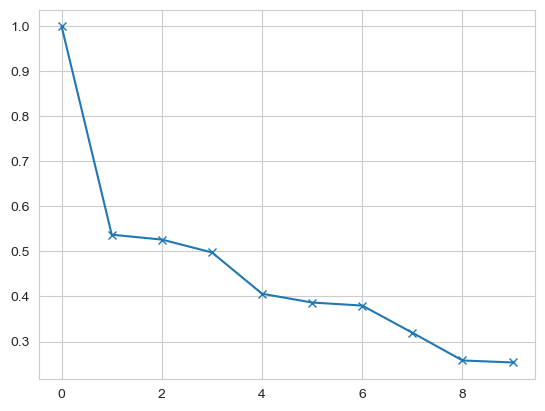

In [80]:
gnx = nk.nxadapter.nk2nx(g)

A = nx.linalg.adjacency_matrix(gnx).todense()

D = np.array([x[1] for x in (gnx.degree)])
D_h = D**(0.5)
D_hi = D**(-0.5)

M = np.diag(1/D) @ A
M = 0.5 * M + 0.5 * np.eye(M.shape[0])
# S = np.diag(D_hi) @ A @ np.diag(D_hi)
S = np.diag(D_h) @ M @ np.diag(D_hi)

w, V = np.linalg.eigh(S)

# S = V @ np.diag(w) @ V.T
# M = D^{-1/2} @ S @ D^{1/2} 
# = D^{-1/2} @ V @ np.diag(w) @ V.T @ D^{1/2}
# = Phi @ np.diag(w) @ Psi.T
# Phi = D^{-1/2} @ V
# Psi = D^{1/2} @ V


Phi = np.diag(D_hi) @ V
Psi = np.diag(D_h) @ V

n = Phi.shape[0]

def diff_map(i, t):
    # n = 5, so 0, 1, 2, 3, 4, we want to get 3, 2, 1, 0
    # so 5-2 -> -1, -1
    return np.array([Phi[i, j] for j in range(n-2, -1, -1)]) * (np.flip(w)[1:]**t)

plt.plot((np.flip(w)**5)[:10], marker='x')

# sorted(w)

(2000, 1999)

<Figure size 640x480 with 0 Axes>

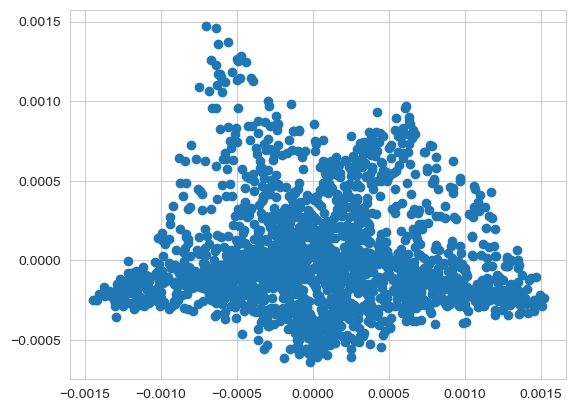

In [76]:
pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 5]
plt.scatter(xs, ys)
# for i in range(len(xs)):
#     _ = plt.annotate(i, (xs[i], ys[i]))

In [5]:
points = np.random.random((5, 2))
(points[:, None, :] - points[None, :, :]).shape

(5, 5, 2)

In [6]:
from typing import List

def get_dists_cube(points: np.ndarray):
    return np.linalg.norm(points[:, None, :] - points[None, :, :], ord=np.inf, axis=-1)

def get_probs_cube(weights: List[float], pts: np.ndarray, alpha=2.0, const=1.0):
    """
    Computes min(1, w_u w_v / ||x_u - x_v||_inf^d)^alpha
    as a big n x n square matrix (we only need upper triangular bit tho)
    """
    outer = np.outer(weights, weights)
    n, d = pts.shape
    dists = get_dists_cube(pts)


In [7]:
class Points(np.ndarray):

    def __new__(cls, input_array):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        # Finally, we must return the newly created object:
        return obj

    def dists(self):
        return generation.get_dists_julia(self)

class RealisticInfoArray(np.ndarray):

    def __new__(cls, input_array):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        # add the new attribute to the created instance
        # obj.info = info
        # Finally, we must return the newly created object:
        return obj

    # def __array_finalize__(self, obj):
    #     # see InfoArray.__array_finalize__ for comments
    #     if obj is None: return
    #     self.info = getattr(obj, 'info', None)

    def foo(self):
        print('foo')

points_temp = Points(points)
points_temp.dists()
# asdf = RealisticInfoArray(points)
# asdf.foo()


array([[0.     , 0.04883, 0.3123 , 0.607  , 0.103  ],
       [0.04883, 0.     , 0.2634 , 0.558  , 0.1196 ],
       [0.3123 , 0.2634 , 0.     , 0.4897 , 0.3308 ],
       [0.607  , 0.558  , 0.4897 , 0.     , 0.6255 ],
       [0.103  , 0.1196 , 0.3308 , 0.6255 , 0.     ]], dtype=float16)

In [177]:
asdf.foo()

foo


In [175]:
type(points_temp)

__main__.Points

In [171]:
points_temp.dist()

AttributeError: 'Points' object has no attribute 'dist'

In [167]:
points

array([[0.512, 0.029],
       [0.5  , 0.756],
       [0.26 , 0.195],
       [0.277, 0.708],
       [0.536, 0.251]])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

In [119]:
list(range(5a-2, -1, -1))

[3, 2, 1, 0]

array([6.08337491e-17, 9.54915028e-02, 9.54915028e-02, 3.45491503e-01,
       3.45491503e-01, 6.54508497e-01, 6.54508497e-01, 9.04508497e-01,
       9.04508497e-01, 1.00000000e+00])

In [99]:
a
np.abs(S - v @ np.diag(w) @ v.T).sum()
np.abs(M - Phi @ np.diag(w) @ Psi.T).sum()

1.7609854935063003e-14

1.686774176975156e-14

In [107]:
def diff_map(i, t):
    return np.array([Phi[i, j] for j in range(Phi.shape[1])]) * (w**t)

diff_map(2, 5)

array([-1.86297881e-82, -2.39405269e-06, -7.56943085e-07, -1.26020809e-03,
        9.13777206e-04, -2.30327485e-02,  3.02012521e-02, -1.76647380e-01,
        7.38250414e-02, -2.23606798e-01])

In [79]:
sorted(w1)

[-1.0000000000000004,
 -0.9876883405951382,
 -0.9876883405951371,
 -0.951056516295154,
 -0.9510565162951538,
 -0.8910065241883696,
 -0.8910065241883685,
 -0.8090169943749482,
 -0.8090169943749477,
 -0.7071067811865502,
 -0.7071067811865471,
 -0.5877852522924752,
 -0.5877852522924719,
 -0.4539904997395473,
 -0.4539904997395466,
 -0.30901699437494823,
 -0.30901699437494756,
 -0.15643446504023104,
 -0.15643446504023084,
 -1.490156693593269e-16,
 -1.490156693593269e-16,
 0.15643446504023084,
 0.1564344650402315,
 0.3090169943749466,
 0.30901699437494773,
 0.45399049973954636,
 0.45399049973954686,
 0.587785252292473,
 0.5877852522924731,
 0.707106781186547,
 0.7071067811865471,
 0.8090169943749443,
 0.8090169943749471,
 0.891006524188367,
 0.8910065241883678,
 0.9510565162951519,
 0.9510565162951538,
 0.9876883405951358,
 0.9876883405951378,
 0.9999999999999998]

In [68]:
X = np.random.random((40,40))
X = X + X.T
w1, v1 = np.linalg.eig(X)
w1 = w1.real
v1 = v1.real

In [69]:
v1 @ np.diag(w1) @ v1.T - X

array([[-9.54791801e-15, -4.21884749e-15, -1.77635684e-15, ...,
        -2.88657986e-15, -2.66453526e-15, -3.77475828e-15],
       [-4.66293670e-15, -3.77475828e-15, -7.10542736e-15, ...,
        -4.99600361e-15, -4.66293670e-15, -8.88178420e-16],
       [-1.77635684e-15, -7.10542736e-15,  1.22124533e-15, ...,
        -2.38697950e-15, -1.77635684e-15,  1.80411242e-16],
       ...,
       [-2.88657986e-15, -5.21804822e-15, -2.44249065e-15, ...,
         2.10942375e-15, -3.33066907e-15,  8.88178420e-16],
       [-2.66453526e-15, -4.21884749e-15, -1.55431223e-15, ...,
        -3.33066907e-15, -4.10782519e-15, -1.11022302e-15],
       [-3.77475828e-15, -8.88178420e-16,  1.24900090e-16, ...,
         1.22124533e-15, -1.11022302e-15,  4.66293670e-15]])

In [96]:
gnx = nk.nxadapter.nk2nx(g)

A = nx.linalg.adjacency_matrix(gnx).todense()

D = np.array([x[1] for x in (gnx.degree)])
D_inv = 1/D
D_half = np.sqrt(D)
D_invhalf = 1/D_half

M = D_inv[:, np.newaxis] * A
S = D_invhalf[:, np.newaxis] * A * D_invhalf


/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_15710/4169547437.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.linalg.adjacency_matrix(gnx).todense()


ValueError: shapes (40,1) and (40,40) not aligned: 1 (dim 1) != 40 (dim 0)

In [98]:
D_inv.shape
A.shape

(40,)

(40, 40)

In [101]:
bar.shape
foo.shape

(4,)

(4, 4)

In [99]:
foo = np.arange(16).reshape(4,4)
bar = np.arange(4)
foo
bar
# (1, 4) * (4, 4)
bar * foo
# (4, 1) * (4, 4)
bar[:, np.newaxis] * foo


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([0, 1, 2, 3])

array([[ 0,  1,  4,  9],
       [ 0,  5, 12, 21],
       [ 0,  9, 20, 33],
       [ 0, 13, 28, 45]])

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [16, 18, 20, 22],
       [36, 39, 42, 45]])

In [60]:
diffmap = lambda i: np.array(Phi[i, 1:].real).squeeze() * v3[1:].real

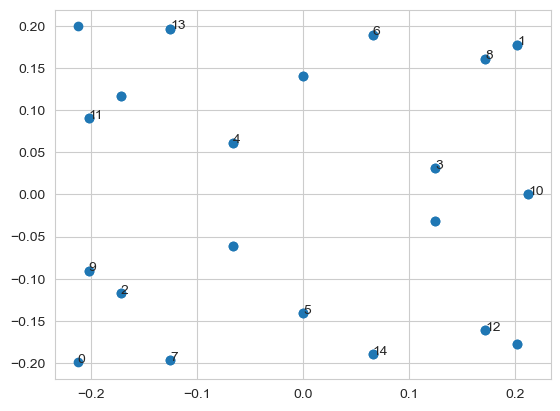

In [74]:
pts = [diffmap(i)[:2] for i in range(n)]
x, y = zip(*pts)
fig, ax = plt.subplots()
ax.scatter(x, y)
for i in range(15):
    _ = ax.annotate(str(i), (x[i], y[i]))

plt.show()

In [58]:
diffmap(0)[:4]

array([-0.15037524,  0.1408805 , -0.15616724,  0.15616724])

In [59]:
diffmap(1)[:4]

array([-0.15037524,  0.1408805 , -0.15616724,  0.15616724])